In [12]:
import pandas as pd
import scipy as sp
import numpy as np

feeds = pd.read_csv('feeds.csv')
users = pd.read_csv('users.csv')
videos = pd.read_csv('videos.csv')
watchedVideo = pd.read_csv('watchedVideo.csv')

feeds = feeds.drop('Unnamed: 0', 1)
users = users.drop('Unnamed: 0', 1)
videos = videos.drop('Unnamed: 0', 1)
watchedVideo = watchedVideo.drop('Unnamed: 0', 1)

merge1 = pd.merge(watchedVideo, feeds, left_on='feedId', right_on='id', how='inner')
merge2 = pd.merge(merge1, users, left_on='userId', right_on='id', how='inner')
data = pd.merge(merge2, videos, left_on='videoId', right_on='id', how='inner')

# print(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coordinates_x  50000 non-null  object 
 1   os             50000 non-null  object 
 2   duration_x     50000 non-null  float64
 3   videoId        50000 non-null  object 
 4   userId         50000 non-null  object 
 5   appVersion     50000 non-null  object 
 6   dateTime       50000 non-null  object 
 7   feedId         50000 non-null  object 
 8   id_x           50000 non-null  object 
 9   name           50000 non-null  object 
 10  id_y           50000 non-null  object 
 11  created_at_x   50000 non-null  object 
 12  class          50000 non-null  object 
 13  coordinates_y  50000 non-null  object 
 14  id             50000 non-null  object 
 15  attribute_id   50000 non-null  object 
 16  music_id       50000 non-null  object 
 17  animation_id   50000 non-null  object 
 18  durati

In [13]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,duration_x,duration_y,num_shares
0,3.95,3.95,16
1,3.95,3.95,16
2,3.95,3.95,16
3,3.95,3.95,16
4,3.95,3.95,16


array([[<AxesSubplot:title={'center':'duration_x'}>,
        <AxesSubplot:title={'center':'duration_y'}>],
       [<AxesSubplot:title={'center':'num_shares'}>, <AxesSubplot:>]],
      dtype=object)

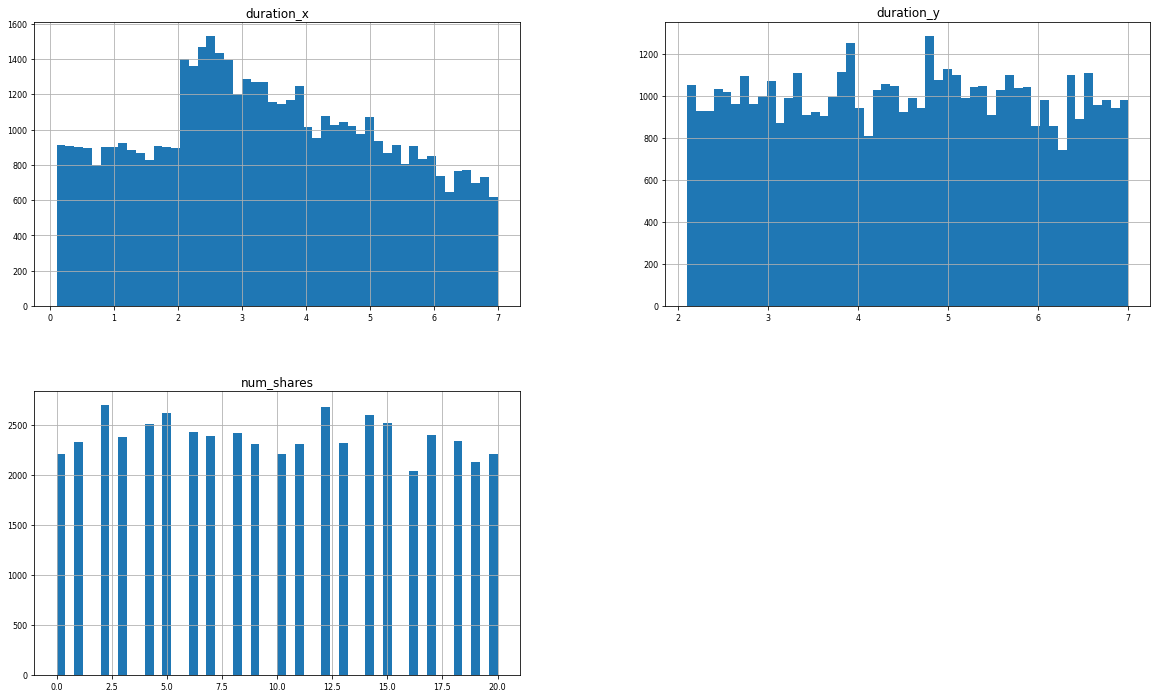

In [51]:
df_num.hist(figsize=(20, 12), bins=50, xlabelsize=8, ylabelsize=8)

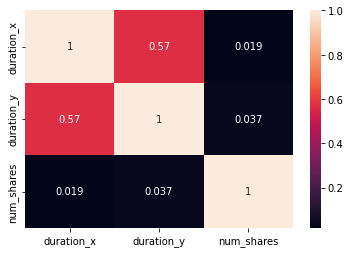

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr= df_num.corr(method ='pearson')

hm = sns.heatmap(corr, annot = True)

plt.show()